### Import librarty , Load Datasets #Perform quick fixes

This section will focus primarily on loading libraries and the dataset to be use in this analysis.

The dataset was download from this [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv) as a **csv** dataset.

In [10]:
# load in library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Quick fixes

In [5]:
# performing quick fixes to remove trailing white spaces and 
# and also dropping columns not needed
df.columns = df.columns.str.lower().str.strip()

df.drop(df.columns[0], axis=1, inplace= True)
df.head(3)

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


#### Scrutiny
The idea here is to check the data for missing values as most machine learning algorithms do not 
work well with missing dataset.

In [6]:
df.isnull().any().sum()

0

#### EDA

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tv', ylabel='Count'>

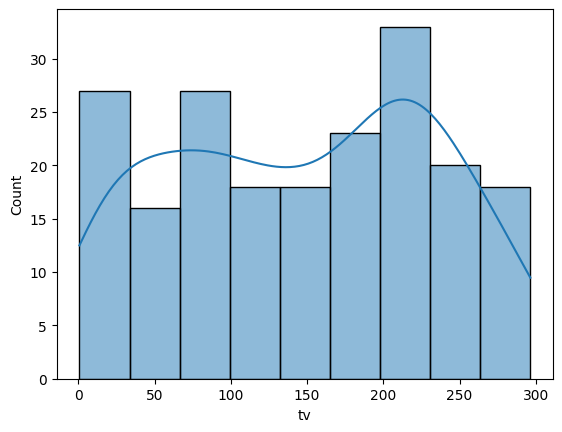

In [12]:
sns.histplot(df['tv'], kde=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='radio', ylabel='Count'>

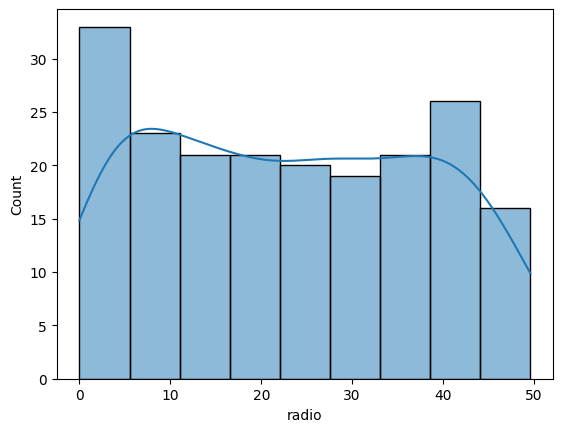

In [14]:
sns.histplot(df['radio'], kde=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='newspaper', ylabel='Count'>

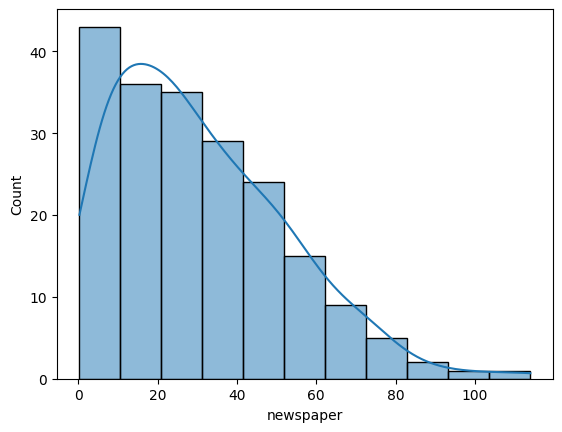

In [15]:
sns.histplot(df['newspaper'], kde=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Count'>

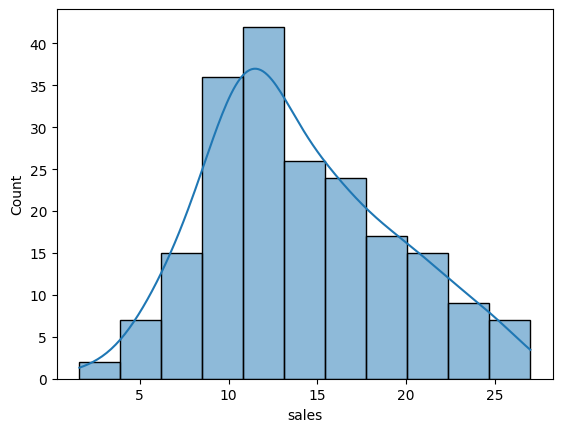

In [16]:
sns.histplot(df['sales'], kde=True)

#### Checking for relationships and potental candidate for building linear regression

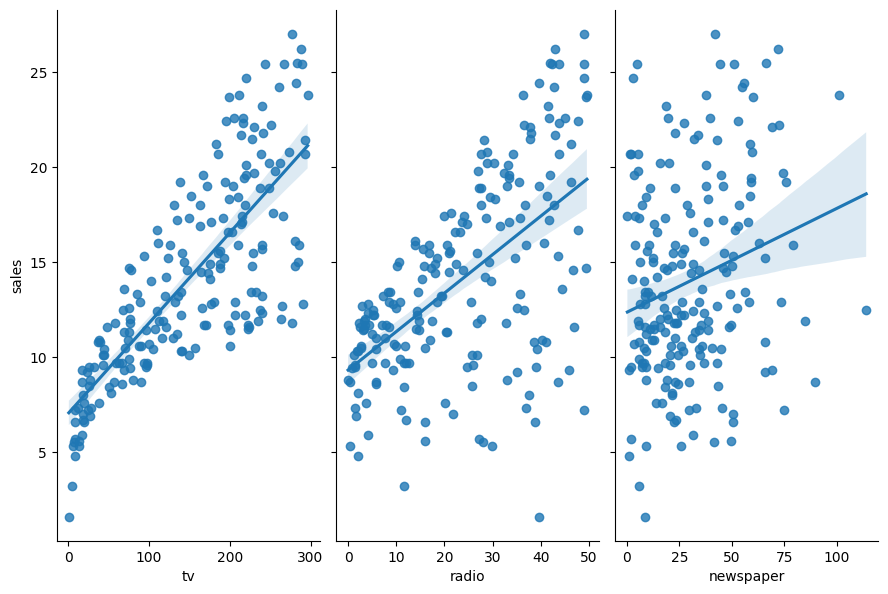

In [20]:
sns.pairplot(df,x_vars=df.columns[0:3], y_vars=df.columns[-1],height=6, aspect=0.5, kind='reg')

In [22]:
# check for the correlation coeeficient between all the ariables
df.corr()

,tv,radio,newspaper,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

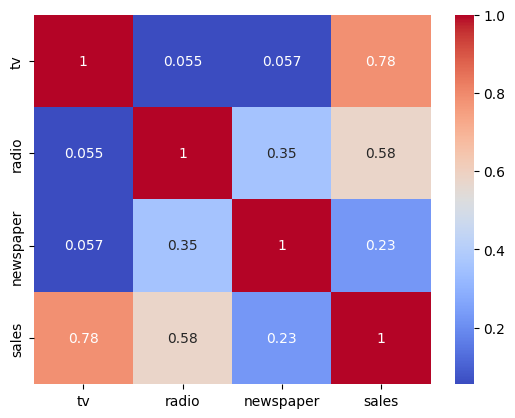

In [24]:
# visualize the result
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [26]:
# lets set our parameters (x and y)
# x which is the variable can be a pandas dataframe or numpy array
# y which is the response can be a series

x = df[['tv']]
y = df.sales


### Import Scikit Learn and split the datasets into training and test sets

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 1)
(150,)
(50, 1)
(50,)


In [34]:
# training the datasets
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [35]:
# interpeting coefficients
intercept = linreg.intercept_
coefficient = linreg.coef_

print(intercept)
print(coefficient)

6.9119726188687185
[0.04802945]


In [ ]:
# Interpretation of the coefficient

# for a given amount of radio and newpaper ad spending, a unit increase in Tv ad spending is asociated with a 0.0482945 unit increase in the sales revenue